In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os

# Change working directory
os.chdir(r"C:\Users\HP\furniture-recommender")
print("Now in:", os.getcwd())

# Check if the dataset exists
print(os.path.exists('data/furniture_data.csv'))



# df = pd.read_csv('data\furniture_data.csv')
# print(f"Dataset shape: {df.shape}")
# print("\nFirst few rows:")
# df.head()

Now in: C:\Users\HP\furniture-recommender
True


In [10]:
import pandas as pd
df = pd.read_csv('data/furniture_data.csv')
print(df.shape)
df.head()


(312, 12)


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


In [11]:
# Cell 3: Check for missing values
# Understanding missing data helps us decide how to clean it
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing percentage: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")


Missing values per column:
title                   0
brand                   0
description           153
price                  97
categories              0
images                  0
manufacturer          107
package_dimensions      6
country_of_origin     187
material               94
color                  47
uniq_id                 0
dtype: int64

Total missing percentage: 18.46%


In [12]:
# Cell 4: Basic statistics
# Get overview of numerical columns
print("Dataset Info:")
df.info()
print("\nNumerical columns statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.4+ KB

Numerical columns statistics:


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
count,312,312,159,215,312,312,205,306,125,218,265,312
unique,305,264,153,135,87,305,155,286,9,72,143,305
top,"subrtex Leather ding Room, Dining Chairs Set o...",MoNiBloom Store,"multiple shoes, coats, hats, and other items E...",$24.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/31SejUEW...,No,"36""L x 24""W",China,Wood,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
freq,2,5,2,9,22,2,32,5,98,32,45,2


Unique categories:
categories
['Patio, Lawn & Garden', 'Outdoor Décor', 'Doormats']                                                        22
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Tables', 'End Tables']                             21
['Home & Kitchen', 'Home Décor Products', 'Mirrors', 'Wall-Mounted Mirrors']                                 21
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Ottomans']                                         20
['Home & Kitchen', 'Furniture', 'Game & Recreation Room Furniture', 'Home Bar Furniture', 'Barstools']       18
['Tools & Home Improvement', 'Hardware', 'Bathroom Hardware', 'Towel Bars']                                  11
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Chairs']                                           10
['Home & Kitchen', 'Furniture', 'Home Office Furniture', 'Home Office Chairs', 'Home Office Desk Chairs']    10
['Home & Kitchen', 'Furniture', 'Home Office Furniture', 'Home Office Desk

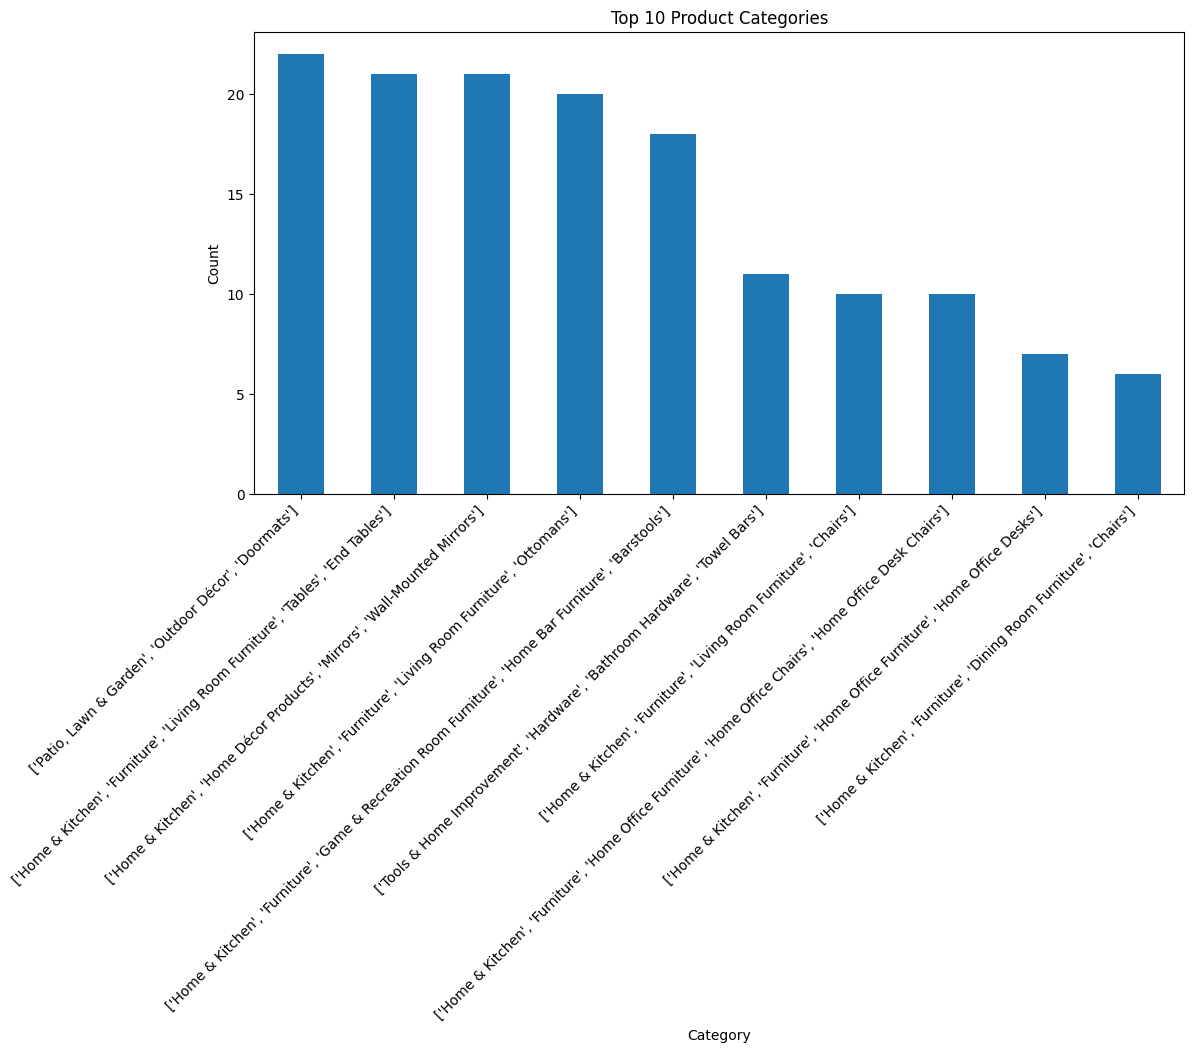

In [13]:
# Cell 5: Analyze categories
# Understanding product categories helps with recommendations
print("Unique categories:")
print(df['categories'].value_counts().head(10))

# Visualize top 10 categories
plt.figure(figsize=(12, 6))
df['categories'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Cell 6: Analyze brands
print("\nTop 10 brands:")
print(df['brand'].value_counts().head(10))


Top 10 brands:
brand
MoNiBloom Store                  5
Flash Furniture Store            5
Kingston Brass Store             4
HomePop Store                    4
Caroline's Treasures Store       4
Convenience Concepts Store       3
Alise Store                      2
GXFC ZHAO Store                  2
ODK Store                        2
Christopher Knight Home Store    2
Name: count, dtype: int64


In [15]:
# Fill missing prices with median
df['price'] = df['price'].fillna(df['price'].median())

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1, 2, 1)
df['price'].plot(kind='hist', bins=30)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
df['price'].plot(kind='box')
plt.title('Price Box Plot')
plt.ylabel('Price')

plt.tight_layout()
plt.show()



TypeError: Cannot convert ['$24.99' nan '$5.98' '$13.99' '$89.99' nan '$63.99' '$24.99' nan '$5.98'
 '$13.99' '$89.99' nan '$63.99' '$39.99' nan nan '$260.80' '$46.99' nan
 '$53.99' nan nan nan nan nan '$18.99' '$79.99' '$13.99' nan '$140.00'
 '$69.99' nan nan '$16.59' '$8.99' '$49.99' nan '$54.99' '$16.99' '$24.88'
 '$64.99' '$69.00' '$89.98' nan '$15.99' '$159.99' '$18.99' '$13.90' nan
 '$143.98' '$69.99' '$95.99' '$39.99' nan nan '$55.99' '$17.99' nan nan
 '$69.91' '$24.97' nan '$65.99' nan '$27.99' nan '$22.39' nan nan '$59.90'
 '$189.99' nan '$132.00' nan '$90.00' nan nan '$39.97' '$68.99' '$27.99'
 '$55.00' '$49.99' '$179.99' nan '$49.99' nan '$126.99' nan '$72.99' nan
 nan '$129.99' '$66.95' nan '$19.99' nan '$24.99' nan '$29.99' '$99.99'
 nan '$59.99' nan '$22.99' '$24.99' nan '$27.99' '$79.99' '$109.99'
 '$19.99' '$219.99' '$22.98' '$22.99' '$59.99' nan '$39.99' '$219.99'
 '$179.00' '$11.77' '$11.79' '$139.99' '$9.99' '$42.49' '$54.99' nan
 '$24.99' nan '$67.90' nan nan nan '$50.00' nan '$259.99' nan '$111.00'
 '$237.00' '$64.90' '$29.99' nan '$69.99' '$42.99' '$37.49' '$169.99' nan
 '$24.99' '$66.99' '$52.99' nan '$8.59' nan '$69.99' nan '$349.00' nan
 '$43.99' '$59.99' '$26.49' '$42.99' '$75.99' '$14.95' nan nan nan '$0.60'
 nan '$79.99' '$22.99' '$12.99' '$59.99' nan '$49.99' '$33.99' nan
 '$15.00' '$69.99' '$65.64' '$35.99' '$12.99' '$99.00' '$79.99' '$25.00'
 '$34.99' '$99.99' '$79.99' '$99.49' '$95.20' '$86.99' nan nan nan nan
 '$79.99' '$56.89' nan '$39.99' nan '$46.00' '$69.99' '$34.95' '$95.99'
 '$46.95' '$139.99' nan '$19.98' '$110.24' '$7.99' nan '$16.99' '$74.99'
 '$99.99' '$50.00' nan '$130.00' '$19.90' '$59.99' nan '$125.99' nan
 '$41.99' nan '$149.99' '$149.99' '$25.69' nan '$42.99' '$24.99' '$69.99'
 '$11.79' nan '$139.99' nan nan '$15.49' '$99.99' nan '$27.99' '$129.99'
 '$10.99' '$31.99' nan '$54.19' '$13.49' '$24.99' nan '$37.99' '$12.99'
 nan '$65.80' '$63.35' '$9.99' nan '$109.99' '$37.99' nan '$53.99'
 '$64.99' '$63.82' '$206.61' nan '$219.00' '$13.99' '$179.00' '$59.00'
 '$6.75' '$21.99' '$39.98' '$29.99' '$111.95' nan '$34.90' '$65.72'
 '$24.99' '$34.99' '$7.99' '$79.99' '$89.99' '$13.50' '$18.99' nan
 '$119.00' nan '$115.00' nan nan '$239.99' nan '$149.99' nan '$109.99'
 '$13.99' '$51.99' nan '$59.99' nan '$15.70' '$25.02' '$159.99' nan
 '$199.00' nan '$43.99' '$39.90' '$99.95' '$126.40' '$199.99' '$58.99'
 '$9.99' '$35.99' '$67.60' nan] to numeric

In [16]:
# Cell 8: Material and Color analysis
print("\nTop materials:")
print(df['material'].value_counts().head(10))

print("\nTop colors:")
print(df['color'].value_counts().head(10))



Top materials:
material
Wood               32
Engineered Wood    25
Rubber             15
Metal              15
Foam               12
Iron                8
Brass               7
Sponge              5
Bamboo              5
Stainless Steel     5
Name: count, dtype: int64

Top colors:
color
Black           45
White           13
Grey            13
Brown           10
Blue             6
Green            5
Beige            4
Red              4
Silver           4
Rustic Brown     4
Name: count, dtype: int64


In [17]:
# Cell 9: Clean and prepare data for ML
# Remove rows with critical missing values and create a clean dataset
df_clean = df.copy()

# Fill missing descriptions with title
df_clean['description'] = df_clean['description'].fillna(df_clean['title'])

# Fill missing categorical values with 'Unknown'
categorical_cols = ['brand', 'categories', 'material', 'color', 'country_of_origin']
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna('Unknown')

## Remove $ and commas, then convert to float
df_clean['price'] = df_clean['price'].replace('[\$,]', '', regex=True).astype(float)

# Now fill missing values with median
df_clean['price'] = df_clean['price'].fillna(df_clean['price'].median())


print(f"Clean dataset shape: {df_clean.shape}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Clean dataset shape: (312, 12)
Remaining missing values: 113


In [18]:
# # Cell 10: Save cleaned data
# # Save the processed dataset for model training
# df_clean.to_csv('../data/furniture_data_clean.csv', index=False)
# print("Cleaned data saved to '../data/furniture_data_clean.csv'")
import os

# Check the folder exists
save_folder = '../data'
print(os.path.exists(save_folder))


True


In [19]:
os.makedirs(save_folder, exist_ok=True)  # creates folder if it doesn't exist


In [20]:
df_clean.to_csv(os.path.join(save_folder, 'furniture_data_clean.csv'), index=False)
print(f"Cleaned data saved to '{os.path.join(save_folder, 'furniture_data_clean.csv')}'")


Cleaned data saved to '../data\furniture_data_clean.csv'


In [21]:
import os

save_folder = r"C:\Users\HP\furniture-recommender\data"
os.makedirs(save_folder, exist_ok=True)  # create folder if it doesn't exist

df_clean.to_csv(os.path.join(save_folder, 'furniture_data_clean.csv'), index=False)
print("Cleaned data saved successfully!")


Cleaned data saved successfully!
